In [1]:
import txt2speech_test
from IPython.display import Audio
import IPython
text_vietnamese = """Cuối cùng, ông Đo-no-van gia nhập nhóm của chúng tôi và dẫn đầu một lời cầu nguyện cho những thứ tiêu chuẩn như sức khỏe tốt, thời tiết may mắn. Mặc dù tôi có đi đến nhà thờ Tin lành với ông bà của tôi, tôi không thể tìm ra tôn giáo nào mà tôi muốn theo. Rõ ràng ổng nghĩ mình là một nhà lãnh đạo tinh thần, và dành rất nhiều thời gian cho những người tội lỗi mù quáng, những người sẽ phải chịu sự trừng phạt nhanh chóng vào ngày phán xét. Mãi một lúc sau, khi ông bảo chúng tôi dành một phút im lặng thánh, tôi nghe thấy một giọng nhỏ, run rẩy. Tôi tập trung hơn. Có những tiếng rên nghèn nghẹt.Từ đâu đó bên trong căn phòng. Tôi hé mở mắt trái. Không có ai đang nhìn, mặc dù cái cách gia đình nó không ngừng cười khiến tôi rùng mình. Tôi liếc quanh phòng, chúng tôi chỉ có một mình.

Khi tôi quay về phía vòng tròn, mẹ của Thomas nhìn thẳng vào tôi, nụ cười của bà gần như làm méo mó gương mặt bà. Tôi nhanh chóng nhắm mắt lại, chưa gì đã nôn nóng muốn về nhà. Sự im lặng dường như kéo dài vô tận. Cuối cùng, nhà lãnh đạo tinh thần vỗ tay và nói rằng tôi và Thomas nên đi ra phía sân sau chơi. Trên đường ra khỏi phòng, tôi nghe nhiều tiếng khóc hơn, nhưng sau đó, âm thanh đã tắt. Lúc đó tôi cho rằng, tôi chỉ đang tưởng tượng lung tung thôi.
"""

# print(text_vietnamese)
characters_to_replace = ",.?!():"
# translation_table = str.maketrans(
#     characters_to_replace, "'" * len(characters_to_replace)
# )
# text_vietnamese = [txt.translate(translation_table).replace("'", " ' ") for txt in text_vietnamese]
# text_vietnamese = [txt.replace(char, char+" ' ") for char in characters_to_replace for txt in text_vietnamese]



In [5]:

import re
import string
from vinorm import TTSnorm
from underthesea import sent_tokenize

def append_after_punctuation(text):
    pattern = r"([" + re.escape(",.?!()") + "])"
    result = re.sub(pattern, r"\1 ' ", text)
    return result

In [3]:

# first_para = append_after_punctuation(first_para)
# first_para = text_vietnamese.split('\n\n')
first_para = TTSnorm(text_vietnamese, lower= False, unknown = False)
first_para = sent_tokenize(first_para)
first_para = [append_after_punctuation(txt) for txt in first_para]
first_para

["Cuối cùng , '  ông Đo no van gia nhập nhóm của chúng tôi và dẫn đầu một lời cầu nguyện cho những thứ tiêu chuẩn như sức khỏe tốt , '  thời tiết may mắn . ' ",
 "Mặc dù tôi có đi đến nhà thờ Tin lành với ông bà của tôi , '  tôi không thể tìm ra tôn giáo nào mà tôi muốn theo . ' ",
 "Rõ ràng ổng nghĩ mình là một nhà lãnh đạo tinh thần , '  và dành rất nhiều thời gian cho những người tội lỗi mù quáng , '  những người sẽ phải chịu sự trừng phạt nhanh chóng vào ngày phán xét . ' ",
 "Mãi một lúc sau , '  khi ông bảo chúng tôi dành một phút im lặng thánh , '  tôi nghe thấy một giọng nhỏ , '  run rẩy . ' ",
 "Tôi tập trung hơn . ' ",
 "Có những tiếng rên nghèn nghẹt . ' ",
 "Từ đâu đó bên trong căn phòng . ' ",
 "Tôi hé mở mắt trái . ' ",
 "Không có ai đang nhìn , '  mặc dù cái cách gia đình nó không ngừng cười khiến tôi rùng mình . ' ",
 "Tôi liếc quanh phòng , '  chúng tôi chỉ có một mình . ' Khi tôi quay về phía vòng tròn , '  mẹ của Thomas nhìn thẳng vào tôi , '  nụ cười của bà gần như 

In [14]:
def process_for_tts(paragraph): 
    import re

    pattern = r"([" + re.escape(",.?!()") + "])"
    paragraph = TTSnorm(paragraph, lower= False, unknown = False)
    result = re.sub(pattern, r"\1 ' ", paragraph)
    result = sent_tokenize(result)
    return result

def preprocess(text): 
    paragraphs = text.split('\n\n')

    paragraphs = [process_for_tts(par) for par in paragraphs]
    return paragraphs

In [15]:
first_para = preprocess(text_vietnamese)
first_para

[["Cuối cùng , '  ông Đo no van gia nhập nhóm của chúng tôi và dẫn đầu một lời cầu nguyện cho những thứ tiêu chuẩn như sức khỏe tốt , '  thời tiết may mắn . '",
  "Mặc dù tôi có đi đến nhà thờ Tin lành với ông bà của tôi , '  tôi không thể tìm ra tôn giáo nào mà tôi muốn theo . '",
  "Rõ ràng ổng nghĩ mình là một nhà lãnh đạo tinh thần , '  và dành rất nhiều thời gian cho những người tội lỗi mù quáng , '  những người sẽ phải chịu sự trừng phạt nhanh chóng vào ngày phán xét . '",
  "Mãi một lúc sau , '  khi ông bảo chúng tôi dành một phút im lặng thánh , '  tôi nghe thấy một giọng nhỏ , '  run rẩy . '",
  "Tôi tập trung hơn . '",
  "Có những tiếng rên nghèn nghẹt . '",
  "Từ đâu đó bên trong căn phòng . '",
  "Tôi hé mở mắt trái . '",
  "Không có ai đang nhìn , '  mặc dù cái cách gia đình nó không ngừng cười khiến tôi rùng mình . '",
  "Tôi liếc quanh phòng , '  chúng tôi chỉ có một mình . '"],
 ["Khi tôi quay về phía vòng tròn , '  mẹ của Thomas nhìn thẳng vào tôi , '  nụ cười của bà g

In [4]:
output, model = txt2speech_test.txt2speech(first_para)

Some weights of the model checkpoint at facebook/mms-tts-vie were not used when initializing VitsModel: ['flow.flows.0.wavenet.in_layers.0.weight_g', 'flow.flows.0.wavenet.in_layers.0.weight_v', 'flow.flows.0.wavenet.in_layers.1.weight_g', 'flow.flows.0.wavenet.in_layers.1.weight_v', 'flow.flows.0.wavenet.in_layers.2.weight_g', 'flow.flows.0.wavenet.in_layers.2.weight_v', 'flow.flows.0.wavenet.in_layers.3.weight_g', 'flow.flows.0.wavenet.in_layers.3.weight_v', 'flow.flows.0.wavenet.res_skip_layers.0.weight_g', 'flow.flows.0.wavenet.res_skip_layers.0.weight_v', 'flow.flows.0.wavenet.res_skip_layers.1.weight_g', 'flow.flows.0.wavenet.res_skip_layers.1.weight_v', 'flow.flows.0.wavenet.res_skip_layers.2.weight_g', 'flow.flows.0.wavenet.res_skip_layers.2.weight_v', 'flow.flows.0.wavenet.res_skip_layers.3.weight_g', 'flow.flows.0.wavenet.res_skip_layers.3.weight_v', 'flow.flows.1.wavenet.in_layers.0.weight_g', 'flow.flows.1.wavenet.in_layers.0.weight_v', 'flow.flows.1.wavenet.in_layers.1.wei

In [5]:
import IPython
import noisereduce as nr

for out in output: 
    # out = nr.reduce_noise(y=out, sr=model.config.sampling_rate, stationary=True)
    IPython.display.display(Audio(out, rate=model.config.sampling_rate))

In [ ]:
import scipy

counter = 0
for out in output: 
    scipy.io.wavfile.write(f"./story/{counter}.wav", rate=model.config.sampling_rate, data=out)
    counter+=1

# scipy.io.wavfile.write(f"./story/sample.wav", rate=model.config.sampling_rate, data=output)


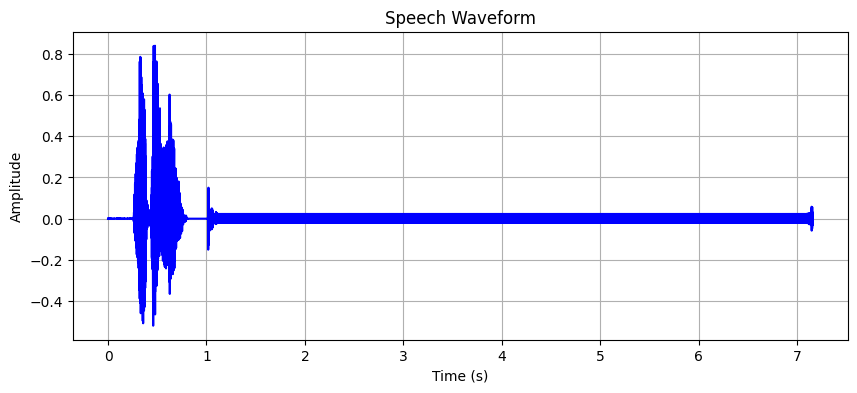

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_speech_wave(data, sample_rate):
    duration = len(data) / sample_rate
    time = np.linspace(0., duration, len(data))

    plt.figure(figsize=(10, 4))
    plt.plot(time, data, color='b')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Speech Waveform')
    plt.grid(True)
    plt.show()

# Example usage
# Assuming you have a NumPy array `speech_data` containing the speech waveform
# and `sample_rate` representing the sample rate of the audio

visualize_speech_wave(output[4], sample_rate = 24000)

In [7]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
import numpy as np

def filter_silence(waveforms): 
    filtered_audio = AudioSegment.empty()
    for waveform in waveforms: 
        # Load audio 
        waveform_integers = np.int16(waveform * 32767)  # Convert to 16-bit PCM

        # Convert the integer waveform to byte data
        byte_data = waveform_integers.tobytes()
        audio = AudioSegment(
            data = byte_data, 
            sample_width=waveform_integers.dtype.itemsize,
            frame_rate=model.config.sampling_rate,
            channels=1
        )

        # Define silence threshold and minimum silence length
        silence_thresh = -35  # in dBFS, adjust according to your audio
        min_silence_len = 500  # in milliseconds

        # Split audio on silence
        chunks = split_on_silence(audio,
                                min_silence_len=min_silence_len,
                                silence_thresh=silence_thresh,
                                keep_silence=100)  # Add a bit of silence back

        # Concatenate chunks to form the final audio
        
        for chunk in chunks:
            filtered_audio += chunk
    return filtered_audio

In [8]:

filtered_audio = filter_silence(output)
filtered_audio.export("output_audio1.wav", format="wav")

<_io.BufferedRandom name='output_audio1.wav'>

# Suno's Bark
Should not use: incorrect generation, limited in language! 

In [ ]:
text = """
He texted me: "There's a floor here, but it's not lit. Should I step out?"

My heart hammered against my ribs as I typed back, urging him to stay put, wait for help. It took ages for him to respond, and when he finally did, his message was chilling. "He smiled. His eyes… no eyes, just black holes."

"Who smiled?" I texted back, a cold dread creeping into my gut.

"The man. On Floor 13." """


In [ ]:
from transformers import BarkModel, AutoProcessor
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model = BarkModel.from_pretrained("suno/bark-small", torch_dtype=torch.float16).to(device)
processor = AutoProcessor.from_pretrained("suno/bark", device="cuda:0")
model.enable_cpu_offload()



2024-06-17 20:50:57.620327: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 20:50:57.975705: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 20:50:58.984984: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


cuda


/home/seito/.conda/envs/py310-nlp/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/home/seito/.conda/envs/py310-nlp/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
/home/seito/.conda/envs/py310-nlp/lib/python3.10/site-packages/transformers/models/encodec/modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_g

In [ ]:
voice_preset = "v2/en_speaker_3"
inputs = processor(text, voice_preset=voice_preset)
inputs = inputs.to(device)
audio_array = model.generate(**inputs)
audio_array = audio_array.cpu().numpy().squeeze()

en_speaker_3_semantic_prompt.npy:   0%|          | 0.00/3.54k [00:00<?, ?B/s]

en_speaker_3_coarse_prompt.npy:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

en_speaker_3_fine_prompt.npy:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [ ]:

from IPython.display import Audio

sampling_rate = model.generation_config.sample_rate
Audio(audio_array, rate=sampling_rate)

In [ ]:
import torch
from TTS.api import TTS

# Get device
device = "cuda" if torch.cuda.is_available() else "cpu"

# List available 🐸TTS models
# print(TTS().list_models())

# Init TTS
tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2").to(device)

# Run TTS
# ❗ Since this model is multi-lingual voice cloning model, we must set the target speaker_wav and language
# Text to speech list of amplitude values as output
# wav = tts.tts(text="Hello world!", speaker_wav="my/cloning/audio.wav", language="en")
# Text to speech to a file
tts.tts_to_file(text="The Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is a taxonomy, or grouping, for personality traits.", language="en", file_path="output.wav")

 > You must confirm the following:
 | > "I have purchased a commercial license from Coqui: licensing@coqui.ai"
 | > "Otherwise, I agree to the terms of the non-commercial CPML: https://coqui.ai/cpml" - [y/n]


Exception:  [!] You must agree to the terms of service to use this model.